# R Programming 

## 1.1 Summary Statistics 

In [ ]:
#install.packages('rvest')
#install.packages('xml2')
#install.packages('XML')


In [4]:
library(rvest)
library(xml2)
library(XML)

Loading required package: xml2

Attaching package: ‘XML’

The following object is masked from ‘package:rvest’:

    xml



In [5]:
oil_exports<- read_html("https://en.wikipedia.org/wiki/List_of_countries_by_oil_exports")
oil_exports=oil_exports %>%
html_table(fill = TRUE)

In [6]:
oil_exports2=data.frame(oil_exports[2])

In [7]:
colnames(oil_exports2)

[1] "Rank"                      "Country.Region"           
[3] "Oil...exports..bbl.day."   "Date.of.information"      
[5] "Oil...exports..bbl.day..1" "Date.of.information.1"

In [8]:
summary(oil_exports2)

      Rank       Country.Region     Oil...exports..bbl.day. Date.of.information
 Min.   : 1.00   Length:74          Length:74               Length:74          
 1st Qu.:19.25   Class :character   Class :character        Class :character   
 Median :37.50   Mode  :character   Mode  :character        Mode  :character   
 Mean   :37.50                                                                 
 3rd Qu.:55.75                                                                 
 Max.   :74.00                                                                 
                                                                               
 Oil...exports..bbl.day..1 Date.of.information.1
 Length:74                 Min.   :2012         
 Class :character          1st Qu.:2012         
 Mode  :character          Median :2012         
                           Mean   :2012         
                           3rd Qu.:2012         
                           Max.   :2016         
                 

In [9]:
missValCount <- function(data){
    
    #Make structure of NA analysis data frame
    na_analysis = data.frame()
    
    #Finding required statistics of numeric columns 
    for(col in names(data)){
        num_miss = nrow(data[is.na(data[[col]]),])
        tmp_df = data.frame(col_name = col, count = num_miss)
        na_analysis = rbind(na_analysis, tmp_df)
    }
    print(na_analysis)
}

In [10]:
missValCount(oil_exports2)

                   col_name count
1                      Rank     0
2            Country.Region     0
3   Oil...exports..bbl.day.     0
4       Date.of.information     0
5 Oil...exports..bbl.day..1    59
6     Date.of.information.1    59


In [11]:
colnames(oil_exports2)[colnames(oil_exports2)=="Oil...exports..bbl.day."] <- "oil_exports_c"

In [12]:
colnames(oil_exports2)[colnames(oil_exports2)=="Oil...exports..bbl.day..1"] <- "oil_exports2_c"

In [13]:
colnames(oil_exports2)

[1] "Rank"                  "Country.Region"        "oil_exports_c"        
[4] "Date.of.information"   "oil_exports2_c"        "Date.of.information.1"

In [14]:
oil_exports3=oil_exports2

In [15]:
class(oil_exports2$oil_exports_c)

[1] "character"

In [16]:
oil_exports2$oil_exports_c=as.numeric(as.character(oil_exports2$oil_exports_c))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [17]:
class(oil_exports2$oil_exports_c)

[1] "numeric"

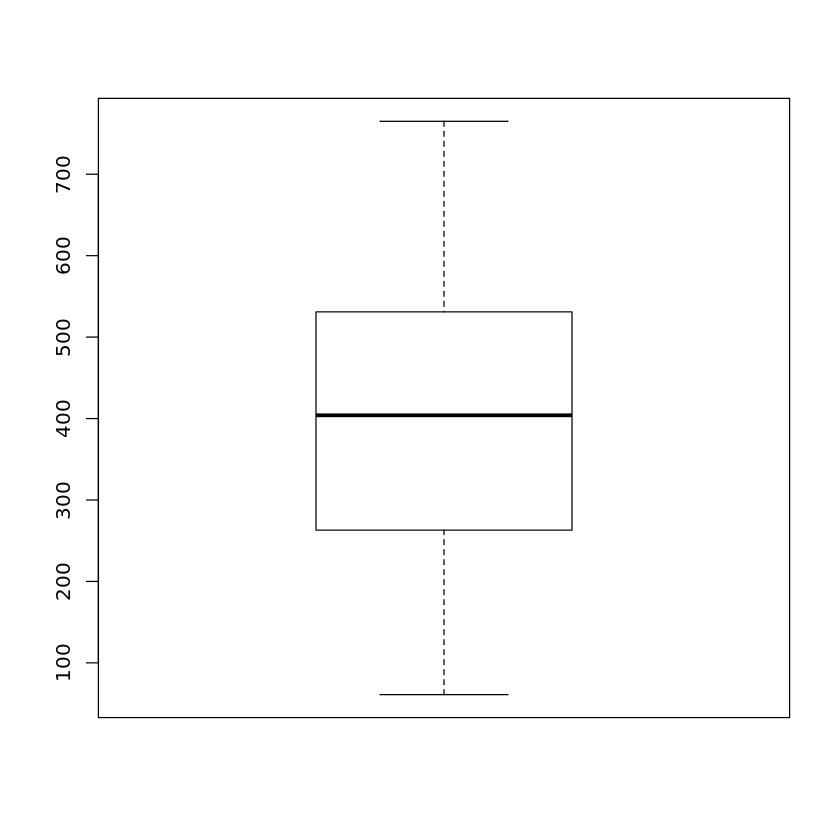

In [19]:
boxplot(oil_exports2$oil_exports_c)

In [20]:
summary(oil_exports2)

      Rank       Country.Region     oil_exports_c   Date.of.information
 Min.   : 1.00   Length:74          Min.   : 61.0   Length:74          
 1st Qu.:19.25   Class :character   1st Qu.:263.0   Class :character   
 Median :37.50   Mode  :character   Median :404.0   Mode  :character   
 Mean   :37.50                      Mean   :404.8                      
 3rd Qu.:55.75                      3rd Qu.:531.0                      
 Max.   :74.00                      Max.   :765.0                      
                                    NA's   :69                         
 oil_exports2_c     Date.of.information.1
 Length:74          Min.   :2012         
 Class :character   1st Qu.:2012         
 Mode  :character   Median :2012         
                    Mean   :2012         
                    3rd Qu.:2012         
                    Max.   :2016         
                    NA's   :59           

In [21]:
oil_exports3[oil_exports2$Country.Region=="Malaysia",]

,Rank,Country.Region,oil_exports_c,Date.of.information,oil_exports2_c,Date.of.information.1
28,28,Malaysia,"269,000",2012 est.,NA,NA


<font size="+2" style="color:Blue">Malaysia exports 269000 bbl/day therefore Malaysia is in the 1st quartile </font>